<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Data-Overview" data-toc-modified-id="Data-Overview-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Overview</a></span></li><li><span><a href="#Check-Missing-Values" data-toc-modified-id="Check-Missing-Values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Check Missing Values</a></span></li><li><span><a href="#Handle-Missing-Values" data-toc-modified-id="Handle-Missing-Values-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Handle Missing Values</a></span></li><li><span><a href="#Handle-Outliers" data-toc-modified-id="Handle-Outliers-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Handle Outliers</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Response-Variable" data-toc-modified-id="Response-Variable-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Response Variable</a></span></li><li><span><a href="#Dependent-Variables" data-toc-modified-id="Dependent-Variables-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Dependent Variables</a></span><ul class="toc-item"><li><span><a href="#Numeric-Variable" data-toc-modified-id="Numeric-Variable-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Numeric Variable</a></span></li><li><span><a href="#Categorical-Variables" data-toc-modified-id="Categorical-Variables-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Categorical Variables</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Correlation-Plot" data-toc-modified-id="Correlation-Plot-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Correlation Plot</a></span></li><li><span><a href="#Chi-square-Test" data-toc-modified-id="Chi-square-Test-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Chi-square Test</a></span></li></ul></li><li><span><a href="#Predictive-Modeling" data-toc-modified-id="Predictive-Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predictive Modeling</a></span><ul class="toc-item"><li><span><a href="#One-hot-Encoding" data-toc-modified-id="One-hot-Encoding-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>One-hot Encoding</a></span></li><li><span><a href="#Data-Partition" data-toc-modified-id="Data-Partition-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Data Partition</a></span></li><li><span><a href="#Model-Construction" data-toc-modified-id="Model-Construction-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Model Construction</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></li></ul></li></ul></div>

In [146]:
## import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # for chi-square test
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder # for one-hot encoding
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix

In [95]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x: '%.5f' % x) # handle scentific notation

In [96]:
## read data
loan = pd.read_csv("data.csv")

# Introduction

This dataset contains information about lending club's loans that were issued between January 2015 and September 2016. 

In this analysis, I will investigate the variables that can be used to make business rules to reduce default rate, and build predictive models to effectively predict a potential borrower's chance of default.

# Data Preparation

## Data Overview

In [97]:
print("There are",loan.shape[0], "records and", loan.shape[1],"features in our dataset.")

There are 80000 records and 26 features in our dataset.


In [98]:
## first five rows of loan data
loan.head()

,id,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,inq_last_6mths,inq_last_12m
0,88787390,30000,60 months,761.64000,6 years,RENT,100100.00000,Verified,Sep-2016,Current,debt_consolidation,SC,27.42000,Jan-1976,690,694,Dec-2016,709,705,0,0,0,26.00000,nan,0,0.00000
1,74722660,30000,60 months,692.93000,10+ years,MORTGAGE,235000.00000,Source Verified,Apr-2016,Current,home_improvement,PA,7.50000,Jan-1995,670,674,Dec-2016,649,645,0,0,1,16.00000,nan,1,3.00000
2,67919555,16000,60 months,379.39000,6 years,RENT,84000.00000,Not Verified,Jan-2016,Current,debt_consolidation,FL,27.87000,Aug-1998,735,739,Dec-2016,739,735,0,0,0,80.00000,nan,0,2.00000
3,54027458,14000,36 months,439.88000,5 years,RENT,50000.00000,Source Verified,Jul-2015,Fully Paid,debt_consolidation,WV,21.65000,Oct-1996,725,729,Oct-2016,749,745,0,0,0,nan,42.00000,0,nan
4,72594974,7500,36 months,252.67000,3 years,MORTGAGE,68000.00000,Not Verified,Feb-2016,Fully Paid,debt_consolidation,OH,29.09000,Nov-2000,660,664,Dec-2016,709,705,0,0,0,nan,nan,2,5.00000


## Check Missing Values

Before doing analysis, I'll need to check how many missing values do I have in this dataset.

In [99]:
df_missing = pd.DataFrame({'Count': loan.isnull().sum(), 'Percent': round(100 * loan.isnull().sum()/len(loan),2)})
df_missing[df_missing['Count'] != 0].sort_values(by = 'Percent', ascending = False)

,Count,Percent
mths_since_last_record,65468,81.83000
inq_last_12m,42605,53.26000
mths_since_last_delinq,38214,47.77000
emp_length,4869,6.09000
last_credit_pull_d,4,0.00000


## Handle Missing Values

The data is pretty clean, there are only 5 columns with missing values in this dataset. I'll drop the columns that contain more than 40% of missing values because having too many missing values in the columns will affect our analysis, and some machine learning algorithms cannot handle missing values very well.

In [100]:
# check features with more than 40% missing
drop_list = df_missing[df_missing['Percent'] > 40].index
print("There are", len(drop_list), "columns needed to be dropped")

There are 3 columns needed to be dropped


In [101]:
# drop these features
loan_2 = loan.drop(drop_list, axis = 1)

In [102]:
# check the remaining features
df_missing_2 = pd.DataFrame({'Count': loan_2.isnull().sum(), 'Percent': round(100 * loan_2.isnull().sum()/len(loan_2),2)})
df_missing_2[df_missing_2['Count'] != 0].sort_values(by = 'Percent', ascending = False)

,Count,Percent
emp_length,4869,6.09000
last_credit_pull_d,4,0.00000


We have two features that contain missing values left. Firstly,

In [103]:
# drop all the rows which have missing values
loan_3 = loan_2.dropna(axis = 0)

In [104]:
loan_3.dtypes

id                        int64
loan_amnt                 int64
term                     object
installment             float64
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
earliest_cr_line         object
fico_range_low            int64
fico_range_high           int64
last_credit_pull_d       object
last_fico_range_high      int64
last_fico_range_low       int64
acc_now_delinq            int64
delinq_amnt               int64
delinq_2yrs               int64
inq_last_6mths            int64
dtype: object

In [105]:
loan_3.head()

,id,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,delinq_2yrs,inq_last_6mths
0,88787390,30000,60 months,761.64000,6 years,RENT,100100.00000,Verified,Sep-2016,Current,debt_consolidation,SC,27.42000,Jan-1976,690,694,Dec-2016,709,705,0,0,0,0
1,74722660,30000,60 months,692.93000,10+ years,MORTGAGE,235000.00000,Source Verified,Apr-2016,Current,home_improvement,PA,7.50000,Jan-1995,670,674,Dec-2016,649,645,0,0,1,1
2,67919555,16000,60 months,379.39000,6 years,RENT,84000.00000,Not Verified,Jan-2016,Current,debt_consolidation,FL,27.87000,Aug-1998,735,739,Dec-2016,739,735,0,0,0,0
3,54027458,14000,36 months,439.88000,5 years,RENT,50000.00000,Source Verified,Jul-2015,Fully Paid,debt_consolidation,WV,21.65000,Oct-1996,725,729,Oct-2016,749,745,0,0,0,0
4,72594974,7500,36 months,252.67000,3 years,MORTGAGE,68000.00000,Not Verified,Feb-2016,Fully Paid,debt_consolidation,OH,29.09000,Nov-2000,660,664,Dec-2016,709,705,0,0,0,2


## Handle Outliers

In [106]:
loan_3.describe()

,id,loan_amnt,installment,annual_inc,dti,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,delinq_2yrs,inq_last_6mths
count,75127.00000,75127.00000,75127.00000,75127.00000,75127.00000,75127.00000,75127.00000,75127.00000,75127.00000,75127.00000,75127.00000,75127.00000,75127.00000
mean,64669959.88380,15258.90259,448.72659,79560.57686,18.94233,694.25659,698.25671,693.29810,686.11658,0.00674,16.04164,0.35822,0.56556
std,14916864.80415,8748.12253,256.46169,88638.29986,8.96912,30.57034,30.57093,58.42251,78.82776,0.08576,814.15961,0.95046,0.86330
min,65104.00000,1000.00000,30.12000,3600.00000,0.00000,660.00000,664.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,53624519.00000,8375.00000,262.17000,48000.00000,12.38000,670.00000,674.00000,669.00000,665.00000,0.00000,0.00000,0.00000,0.00000
50%,65677417.00000,14000.00000,387.15000,66965.00000,18.33000,685.00000,689.00000,699.00000,695.00000,0.00000,0.00000,0.00000,0.00000
75%,76113556.00000,20000.00000,593.06000,95000.00000,25.02000,710.00000,714.00000,729.00000,725.00000,0.00000,0.00000,0.00000,1.00000
max,90945156.00000,40000.00000,1536.95000,8706582.00000,553.33000,845.00000,850.00000,850.00000,845.00000,3.00000,110626.00000,39.00000,6.00000


# Exploratory Data Analysis

Let's investigate some of the important features further based on my domain knowledge of loan business.

## Response Variable

One of the goals of this analysis is to predict a potential borrower's chance of default. The variable `loan_status` contains three levels: 
* *Current*: The borrower has paid off all due payment as of the latest due date.

* *Fully Paid*: The borrower has paid off the entire balance of the loan

* *Default*: The borrower has missed the last payment

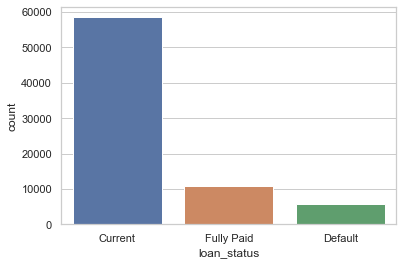

In [107]:
sns.countplot(x = 'loan_status', data = loan_3)

As we can see, a majority of borrowers have paid off all due payment as of the latest due date, followed by fully paid and default. 

The problem of interest here is to predict borrowers with high possibilities to default, so for the sake of this analysis, I will combine *current* and *fully paid* customers together as a new value: Non-default.

In [108]:
# constructed a new binary variable
loan_3.loc[loan_3['loan_status'] == 'Default', 'Default'] = 1
loan_3.loc[loan_3['loan_status'] != 'Default', 'Default'] = 0

# drop the loan_status column
loan_3 = loan_3.drop('loan_status', axis = 1)

# convert data type
loan_3['Default'] = loan_3['Default'].astype('category')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


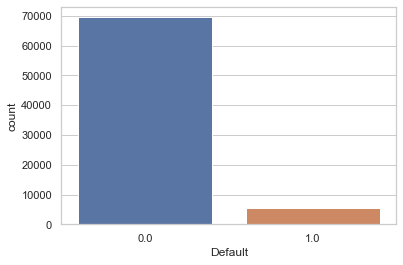

In [109]:
sns.countplot(x = 'Default', data = loan_3)

The response variable is quite imbalanced, this will be some problems when I need to predict the default.

## Dependent Variables

### Numeric Variable

Overall distribution of numeric variable:

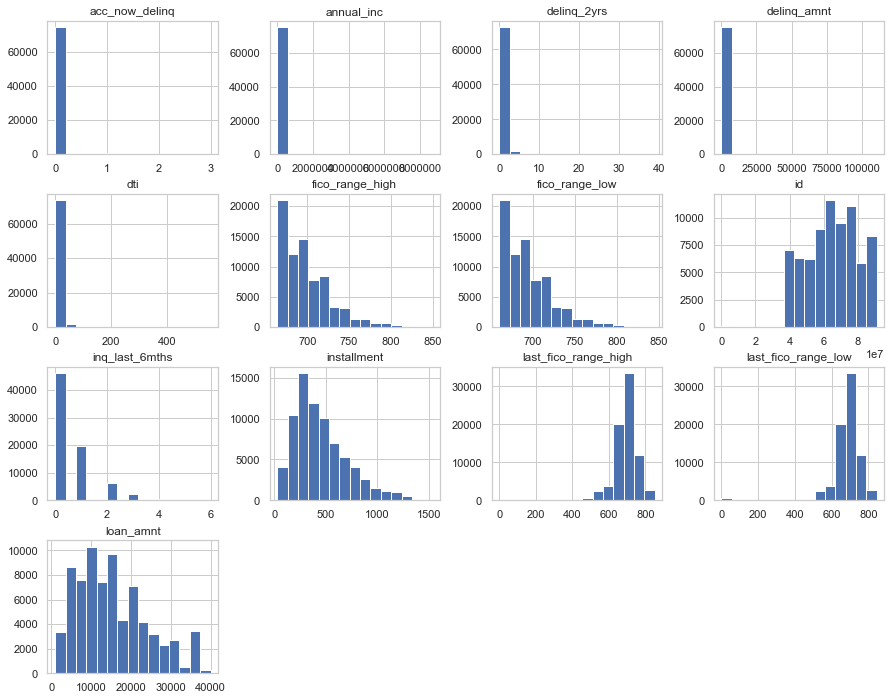

In [110]:
loan_3.hist(figsize = (15,12), bins = 15)
plt.show()

**Loan Amount**

In [111]:
## Function to plot the distribution 
def plot_continuous(df, variable, hue_choice, palette_choice=None):
    g = sns.FacetGrid(df, hue=hue_choice, sharex=True, sharey=True, palette=palette_choice, height=6, aspect=2)
    g = g.map(plt.hist, variable, bins=40, alpha=0.7).add_legend()
    return g

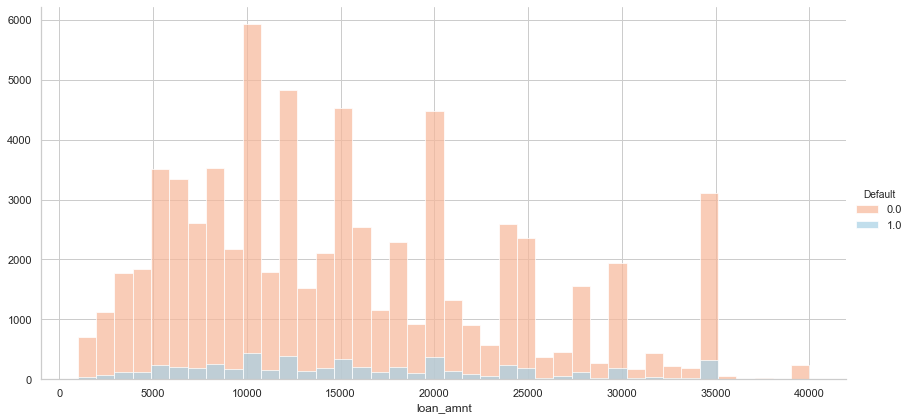

In [112]:
## distribution and box plot for loan amount
#plt.figure(figsize = (12,5))
plot_continuous(loan_3, 'loan_amnt', 'Default', 'RdBu')

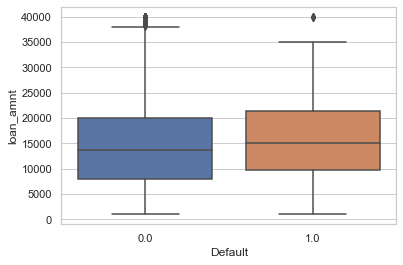

In [113]:
#plt.figure(figsize = (8,8))
sns.boxplot(x = loan_3.Default, y = loan_3.loan_amnt)

### Categorical Variables

**term**

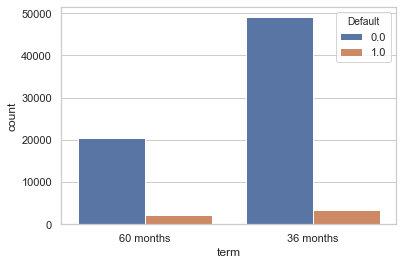

In [114]:
#plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid')
sns.countplot(loan_3.term, hue = loan_3.Default)

Proportionally speaking, the volume of borrowers who have 60-month loan default is much higher than the volume of 36-month loan term borrowers.

**emp_length**

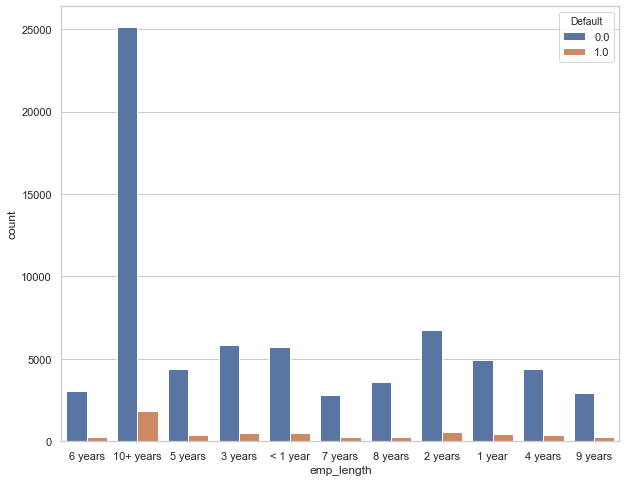

In [115]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid')
sns.countplot(loan_3.emp_length, hue = loan_3.Default)

The percent of default for people with more than 10+ employment histroy is pretty low. 

**home_ownership**

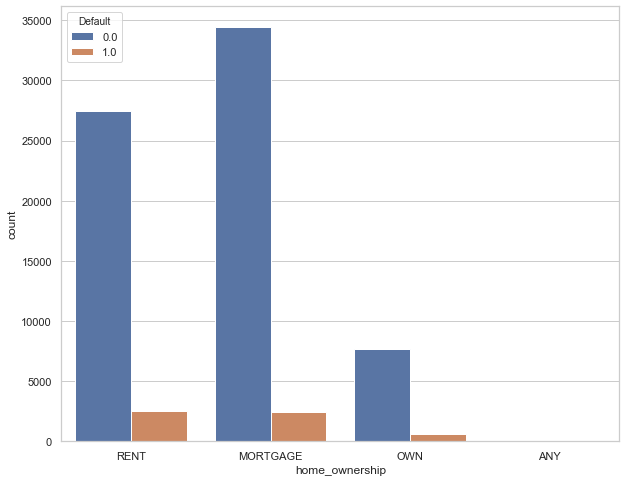

In [116]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid')
sns.countplot(loan_3.home_ownership, hue = loan_3.Default)

Here we can see people who have already owned their house are less likely to default.

# Feature Selection

Given the fact that we don't have a crazy number of variables here, I will use some simple but power feature selection teniques - **correlation** and **chi-square test**.

In [117]:
## drop id and date columns
loan_4 = loan_3.drop(['id', 'issue_d','earliest_cr_line','last_credit_pull_d'], axis = 1)

In [118]:
loan_4.head()

,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,delinq_2yrs,inq_last_6mths,Default
0,30000,60 months,761.64000,6 years,RENT,100100.00000,Verified,debt_consolidation,SC,27.42000,690,694,709,705,0,0,0,0,0.00000
1,30000,60 months,692.93000,10+ years,MORTGAGE,235000.00000,Source Verified,home_improvement,PA,7.50000,670,674,649,645,0,0,1,1,0.00000
2,16000,60 months,379.39000,6 years,RENT,84000.00000,Not Verified,debt_consolidation,FL,27.87000,735,739,739,735,0,0,0,0,0.00000
3,14000,36 months,439.88000,5 years,RENT,50000.00000,Source Verified,debt_consolidation,WV,21.65000,725,729,749,745,0,0,0,0,0.00000
4,7500,36 months,252.67000,3 years,MORTGAGE,68000.00000,Not Verified,debt_consolidation,OH,29.09000,660,664,709,705,0,0,0,2,0.00000


## Correlation Plot

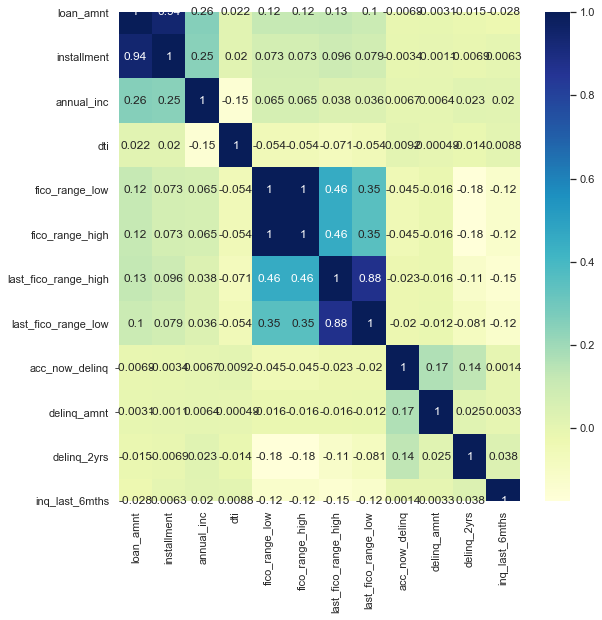

In [119]:
plt.figure(figsize = (9,9))
p = sns.heatmap(loan_4.corr(), annot = True, cmap = "YlGnBu")

* `installment` has very high correlation with `loan_amnt`. 

* `last_fico_range_low` is highly correlated with `last_fico_range_high`

I will drop `installment` and `last_fico_range_low` here. Then we don't have any multicollinearity problem here.

In [120]:
# drop installment
loan_5 = loan_4.drop('installment', axis = 1)

## Chi-square Test

In [121]:
## get categorical variables
cat_variables = loan_5.select_dtypes(include = ['object']).columns
cat_variables

Index(['term', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'addr_state'],
      dtype='object')

In [122]:
## create contigency tables, calculate chi-square and p-value

chi_square = {"variable":[],
            "chi-square":[],
              "p-value":[]}

for var in cat_variables:
    chi_square["variable"].append(var)
    chi_square['chi-square'].append(stats.chi2_contingency(pd.crosstab(loan_5[var], loan_5.Default))[0])
    chi_square['p-value'].append(stats.chi2_contingency(pd.crosstab(loan_5[var], loan_5.Default))[1])

In [123]:
chi_square_df = pd.DataFrame(chi_square)
chi_square_df

,variable,chi-square,p-value
0,term,309.40408,0.00000
1,emp_length,33.90234,0.00019
2,home_ownership,87.47949,0.00000
3,verification_status,280.29308,0.00000
4,purpose,140.01757,0.00000
5,addr_state,121.69402,0.00000


All of these categorical variables are dependent on the response variable -- based on the high chi-square values and low p-value. I'll include all of them in the modeling part.

# Predictive Modeling

## One-hot Encoding

A one-hot encoding is a representation of categorical variables as binary vectors.

In [134]:
dummy_df = pd.get_dummies(loan_5[cat_variables], drop_first = True)
loan_6 = pd.concat([loan_5, dummy_df], axis = 1)
loan_6 = loan_6.drop(cat_variables, axis = 1)
print(loan_6.shape)
loan_6.head()

(75127, 89)


,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,delinq_2yrs,inq_last_6mths,Default,term_60 months,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,30000,100100.00000,27.42000,690,694,709,705,0,0,0,0,0.00000,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,30000,235000.00000,7.50000,670,674,649,645,0,0,1,1,0.00000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,16000,84000.00000,27.87000,735,739,739,735,0,0,0,0,0.00000,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14000,50000.00000,21.65000,725,729,749,745,0,0,0,0,0.00000,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,7500,68000.00000,29.09000,660,664,709,705,0,0,0,2,0.00000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Partition

In [136]:
## 70%-30% Train-Test random split
X = loan_6.drop('Default', axis = 1)
y = loan_6['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 74)

print(X_train.shape)
print(X_test.shape)

(52588, 88)
(22539, 88)


In [139]:
#y.value_counts()

## Model Construction

### Logistic Regression

In [142]:
LR = LogisticRegression()
LR = LR.fit(X_train, np.ravel(y_train))
y_predLR = LR.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [143]:
print("The weights of the attributes are:", LR.coef_)

The weights of the attributes are: [[ 4.25758678e-05 -1.03940494e-07  1.39270222e-02  1.34534884e-02
   1.43597822e-02 -3.44429546e-02 -3.14311100e-04  5.63846714e-05
   5.57742218e-07  1.66600617e-04  1.07982168e-03  3.30363758e-04
  -2.94343965e-06 -3.15581773e-06 -4.22554037e-06  1.22013808e-05
   6.47556146e-06  7.61687066e-05 -1.40593946e-05 -4.93527041e-05
   4.86335634e-05  8.67270327e-05 -4.49957716e-04  1.78511135e-04
   4.98967819e-04  2.76522962e-04  4.62447004e-04 -4.87214527e-05
   6.12936350e-04 -1.81992821e-04  1.52540818e-05 -2.04912101e-05
  -2.07403491e-05 -4.07499659e-05 -2.68767815e-05  1.67031062e-06
  -1.57677883e-05 -1.73691781e-05  0.00000000e+00  6.62840913e-05
   2.13652069e-05  2.01129562e-05  2.58795281e-04  1.89195745e-05
  -2.70755532e-05 -1.49642063e-05 -2.27147497e-05  1.82801249e-06
  -1.07396900e-04  1.98460457e-05 -1.58072917e-07 -9.87202788e-05
   1.54197781e-05  1.31289926e-05 -1.34687715e-05  5.91005745e-05
   3.31870306e-05  5.50027184e-05 -2.7008

In [149]:
# generate a report for model including accraucy, precision, recall and F1
def get_all_measurements(y_test, y_pred, model_name):
    column_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    Auc = auc(fpr,tpr)
    recall = tp / (tp + fn)
    f1 = (2 * precision * recall) / (precision + recall)
    # parameters = model.best_params_
    values = np.array([[acc, precision, recall, f1, Auc]])
    summary = pd.DataFrame(values, index=[model_name], columns=column_names)
    return summary

In [152]:
## confusion matrix
print(classification_report(y_test, y_predLR))

LR_summary = get_all_measurements(y_test, y_predLR, 'Logistic Regression')
LR_summary

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     20804
         1.0       0.77      0.51      0.61      1735

    accuracy                           0.95     22539
   macro avg       0.87      0.75      0.79     22539
weighted avg       0.95      0.95      0.95     22539



,Accuracy,Precision,Recall,F1-Score,AUC
Logistic Regression,0.95062,0.77091,0.51009,0.61394,0.74872


In [1]:
#pip install --upgrade jupyter